# ## Problem Statement:
# The objective of this Case is to Predication of bike rental count on daily based on the
# environmental and seasonal settings.

In [1]:
#!pip install "library name"  # install relevent libraries with this command.
# Importing required libraries. 


import os # input and output operations
import numpy as np # used for data analysis
import pandas as pd # for data manipulation and analysis
import pickle # Dumping your model in pkl format

In [2]:
# For data visualizations 
import matplotlib.pyplot as plt # used for data visualizations
import seaborn as sns # used for data visualizations
from ggplot import*  # used for data visualizations  

In [3]:
# For rendering the plots in jupyter notebook
get_ipython().run_line_magic('matplotlib', 'inline')

In [4]:
from random import randrange, uniform
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

In [5]:
print(os.getcwd())

C:\Users\Rahul


In [6]:
# Set working directory
os.chdir("C:/Users/Rahul")
print(os.getcwd())

C:\Users\Rahul


In [7]:
# Understanding the data :

#Load training data
bike_data = pd.read_csv("day.csv")

In [11]:

# let's preview the training data
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
print("Shape of training data is: ",bike_data.shape) #checking the number of rows and columns in training data

Shape of training data is:  (731, 16)


In [13]:
# Exploratory Data Analysis
# Let's Check for data types of train data:
bike_data.info()
print (bike_data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual  

In [14]:
# In train data observed that fare_amount and pickup_datetime variables are of object type. 
# So, Need to convert fare_amount datatype to 'numeric' & pickup_datetime data type to 'datatime' format.
# Let's understand basic statistics of each (numeric & non-numeric) variables in train data
bike_data.describe()
print(bike_data.shape)
print(bike_data.columns)
print(bike_data.nunique())

(731, 16)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [15]:
# Check variables names of dataset,observed that shortcut names are used viz., hum for humidity
# yr for year ,mnth for month,cnt for count
# Now Rename them for ease of understanding it better:

print("Before renaming variables: ",bike_data.columns)

bike_data = bike_data.rename(columns = {'yr':'year','mnth':'month','weathersit':'weather',
                                        'temp':'temperature','hum':'humidity','cnt':'count'})

print("After renaming variables: ",bike_data.columns)
bike_data.head()

Before renaming variables:  Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
After renaming variables:  Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
# In this dataset cnt is our target variable and it is continous variable 
bike_data['count'] .dtype

dtype('int64')

In [17]:
# Missing Value anlysis
# checking for missing values in dataset
bike_data.isnull().sum()

instant        0
dteday         0
season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weather        0
temperature    0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [18]:
# Remove these variables 
# instant variable, as it is index in dataset
# date variable as we have to predict count on seasonal basis not date basis
# casual and registered variable as count is sum of these two variables
# cnt = casual + registered

bike_data = bike_data.drop(['casual','registered','instant','dteday'],axis=1)

In [19]:
# Lets check dimensions of data after removing some variables
bike_data.shape

(731, 12)

In [20]:
# Make list of categorical and numerical variables of dataframe 
# Continous Variables 
cnames= ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

In [21]:
# Categorical variables-
cat_cnames=['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather']

In [22]:
# looking at five point summary for our numerical variables
bike_data[cnames].describe()

,temperature,atemp,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.059130,0.079070,0.000000,0.022392,22.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000


In [23]:
# unique values of categories variables
bike_data[cat_cnames].nunique()

season         4
year           2
month         12
holiday        2
weekday        7
workingday     2
weather        3
dtype: int64

In [24]:
# Outlier Analysis:
# Lets save copy of dataset before preprocessing
df = bike_data.copy()
Bike_Rent = df.copy()

temperature


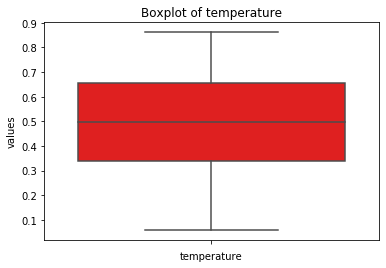

atemp


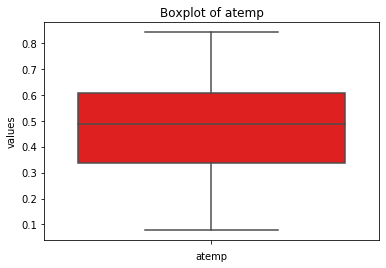

humidity


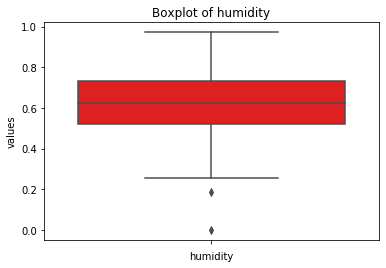

windspeed


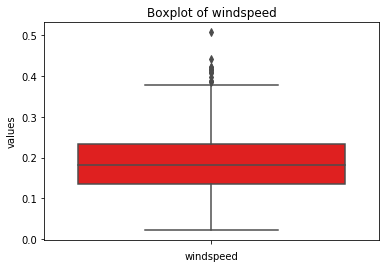

count


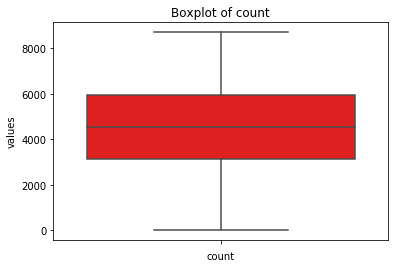

In [25]:
#Plot boxplot to visulazie outliers-
A =['red','blue']
for i in cnames:
    print(i)
    sns.boxplot(y=Bike_Rent[i], color='red' )
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()

In [26]:
# From boxplot we can see outliers in humidity and outliers in windspeed

# Lets cap outliers and inliers with upper fence and lower fence values 
for i in cnames:
    print(i)
    # Quartiles and IQR
    q25,q75 = np.percentile(Bike_Rent[i],[25,75])
    IQR = q75-q25
    
    # Lower and upper limits 
    LL = q25 - (1.5 * IQR)
    UL = q75 + (1.5 * IQR)
    
    # Capping with ul for maxmimum values 
    # For inliers
    Bike_Rent.loc[Bike_Rent[i] < LL ,i] = LL 

   # For outliers
    Bike_Rent.loc[Bike_Rent[i] > UL ,i] = UL

temperature
atemp
humidity
windspeed
count


temperature


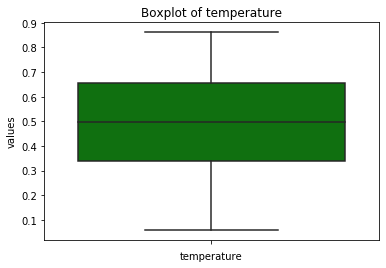

atemp


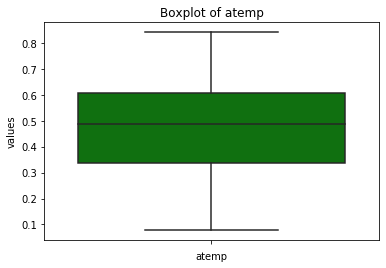

humidity


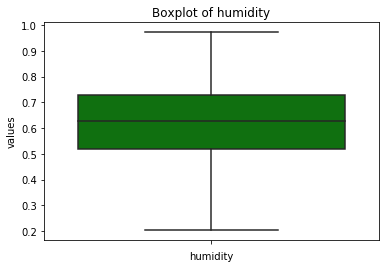

windspeed


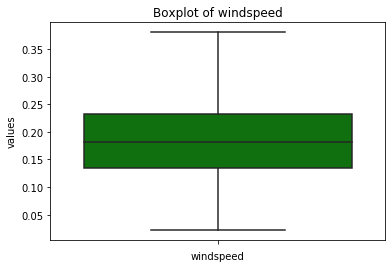

count


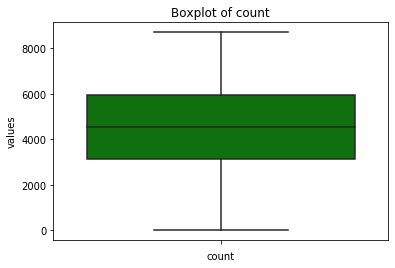

In [27]:
# Lets see our boxplots after removing outliers 
for i in cnames:
    print(i)
    sns.boxplot(y=Bike_Rent[i], color='green')
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()

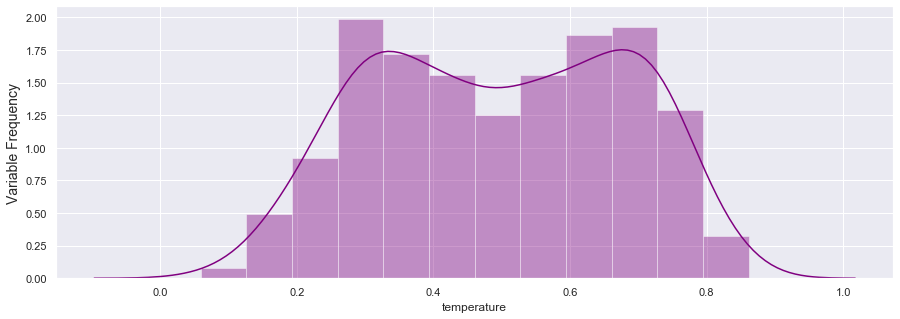

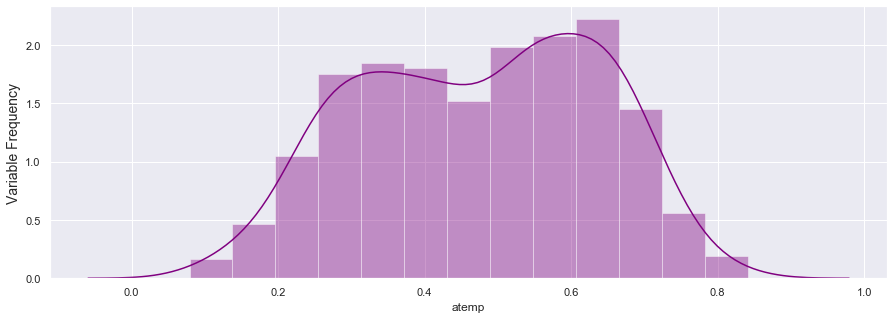

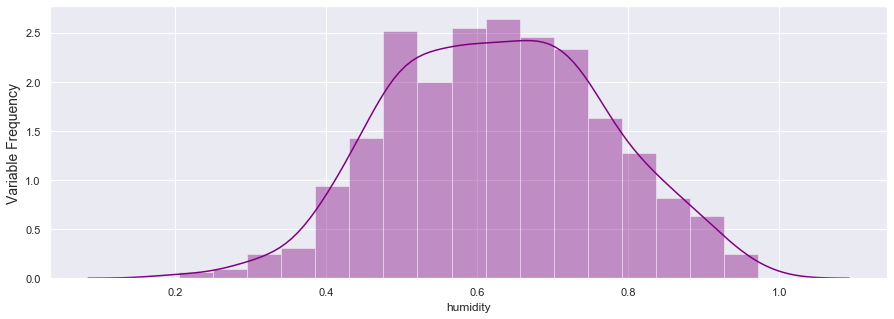

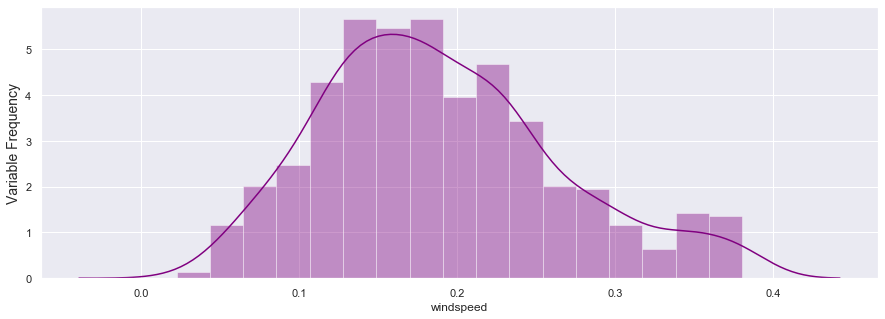

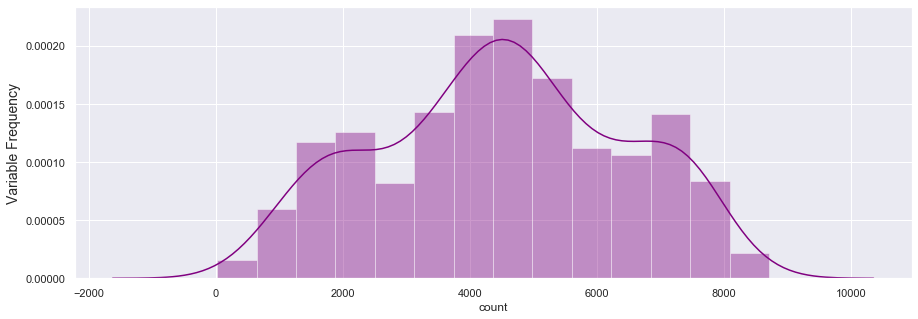

In [28]:
# Data understanding using visualization:
# Multi-Variate Analysis,    Univariate Analysis and   Bi-Variate Analysis of Train dataset
# Univariate Analysis:

# Univariate Analysis : Displays the statistic details or descriptive statistics of each variable
# Histogram for (Numeric) Continuous variables to check  distribution of each variable 

# Histogram for continuous variables to check  distribution of each variable 
for i in cnames:
    sns.set(rc={'figure.figsize':(15,5)})
    sns.distplot(Bike_Rent[i], kde=True,  color='purple',bins ='auto')
    #plt.title(cnamestrain[i], fontsize=14)
   # plt.xlabel(cnamestrain[i], fontsize=14)
    plt.ylabel('Variable Frequency', fontsize=14)
    plt.show()

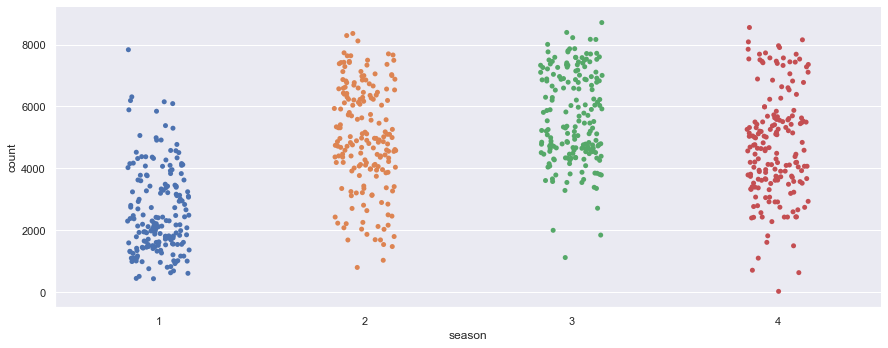

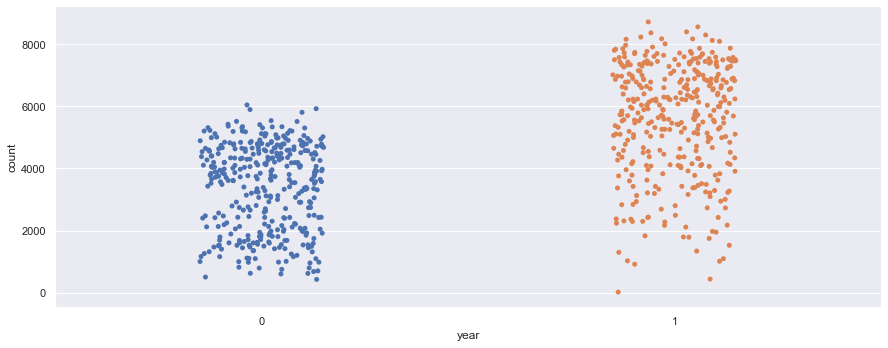

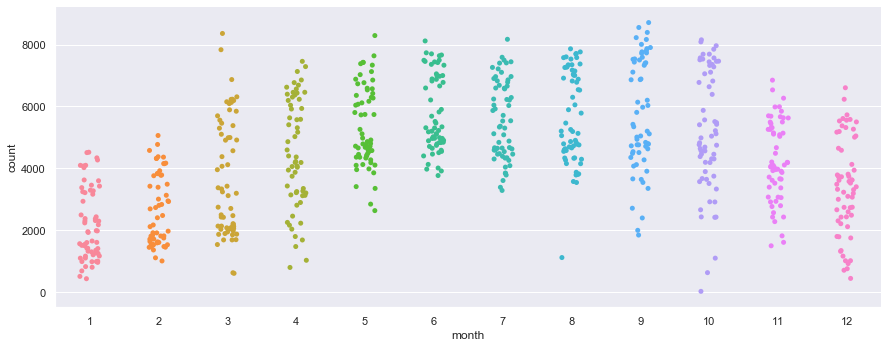

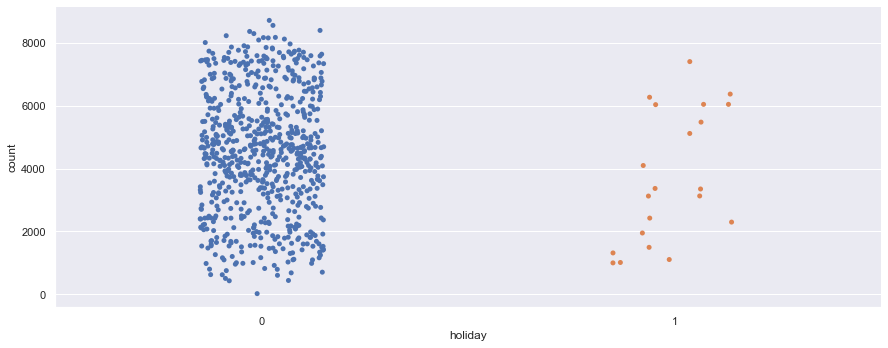

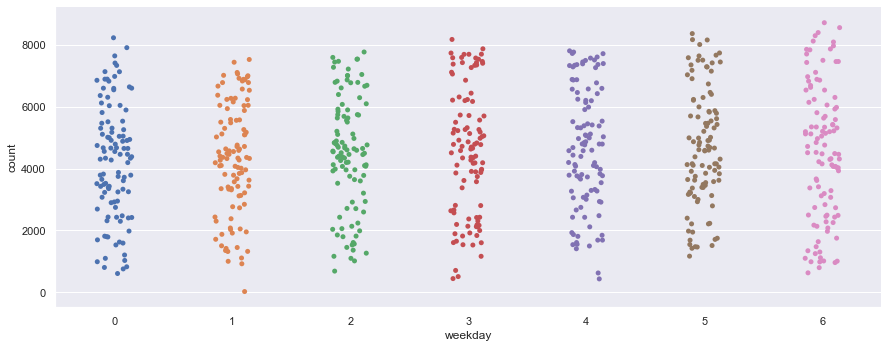

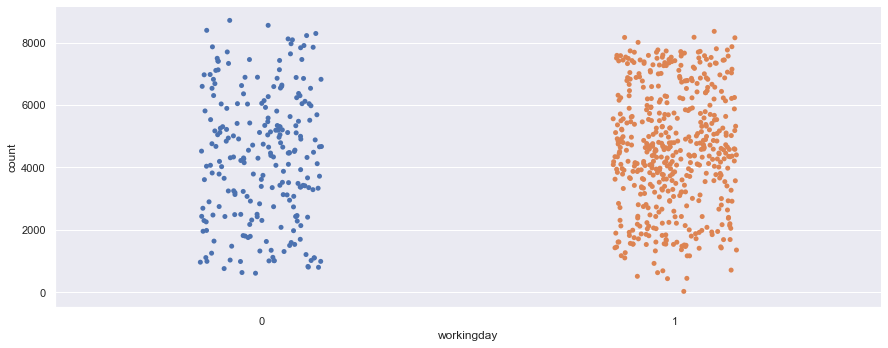

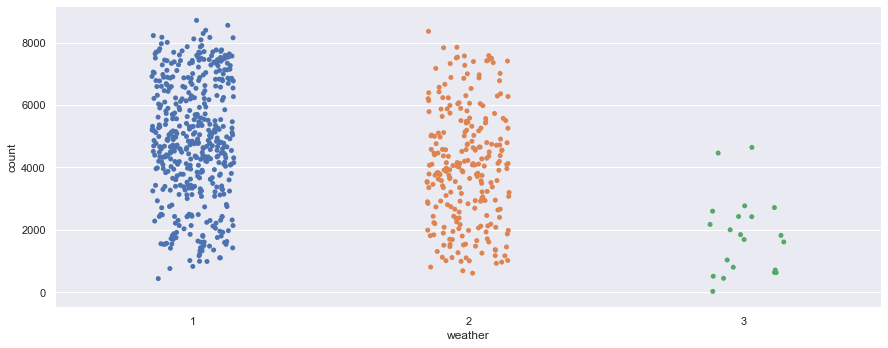

In [29]:
# BI-VARIATE ANALYSIS :
# Bi-variate Analysis using Catplots:

# Lets check impact of continous variables on target variable
for i in cat_cnames:
    sns.catplot(x=i,y="count",data=Bike_Rent,jitter='0.15',aspect=2.5)
    fname = str(i)+'.pdf'
    plt.savefig(fname) 

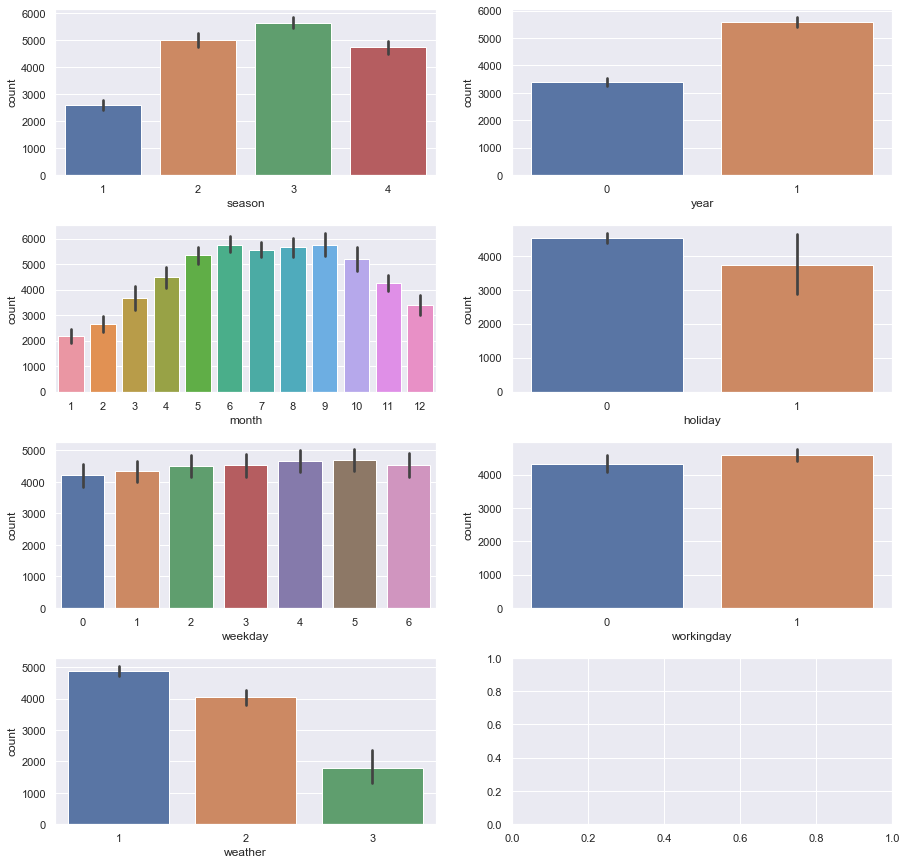

In [30]:

# *From Fisrt plot we can see that season 2,3 and 4 have more bike count as comapre to season 1. the daily bike count for these season was between 4000 to 8000.
# *From year plot we can see that bike count is increased in 2012 as compared to 2011.
# *From month plot we can see the bike count maximum between 4 to 10 month.
# *From holiday the bike count is maximum as comapre to non holiday.
# *Bike count is maximum for day 0,5 and 6 as per weekday varaible.
# *FOr weather 1 the count of bike is maximum, after that for weather 2.

# Bi-variate Analysis using Barplots:

# Let us check impact of categorical variables on count
# For Catagorical Variables
fig, axarr = plt.subplots(4, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=.3)

sns.barplot(x='season', y='count',data=Bike_Rent,ax=axarr[0][0])
sns.barplot(x='year',    y='count',data=Bike_Rent,ax=axarr[0][1])
sns.barplot(x='month',     y='count',data=Bike_Rent,ax=axarr[1][0])
sns.barplot(x='holiday',y='count',data=Bike_Rent,ax=axarr[1][1])
sns.barplot(x='weekday',     y='count',data=Bike_Rent,ax=axarr[2][0])
sns.barplot(x='workingday',  y='count',data=Bike_Rent,ax=axarr[2][1])
sns.barplot(x='weather',  y='count',data=Bike_Rent,ax=axarr[3][0])


In [31]:
# Let us check impact of categorical variables on count 
# Season
print(Bike_Rent.groupby(['season'])['count'].sum())

season
1     471348.0
2     918589.0
3    1061129.0
4     841613.0
Name: count, dtype: float64


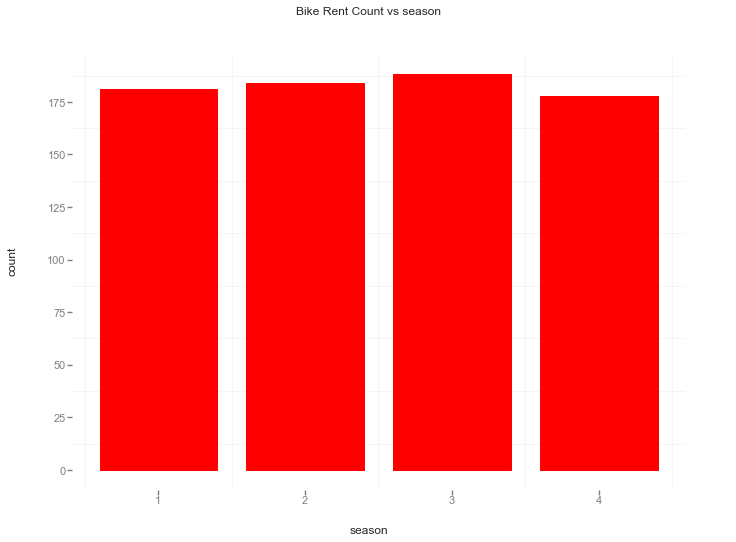

<ggplot: (-9223372036837551508)>

In [32]:
ggplot(Bike_Rent,aes(x='season',y='count'))+    geom_bar(fill="Red")+    scale_color_brewer(type = 'diverging',palette=4)+    xlab("season")+ylab("count") + ggtitle("Bike Rent Count vs season")+ theme_bw()

In [33]:
# Bike rent count is high in season 3(fall) and low in season 1(springer)

# Year
print(Bike_Rent.groupby(['year'])['count'].sum())

year
0    1243103.0
1    2049576.0
Name: count, dtype: float64


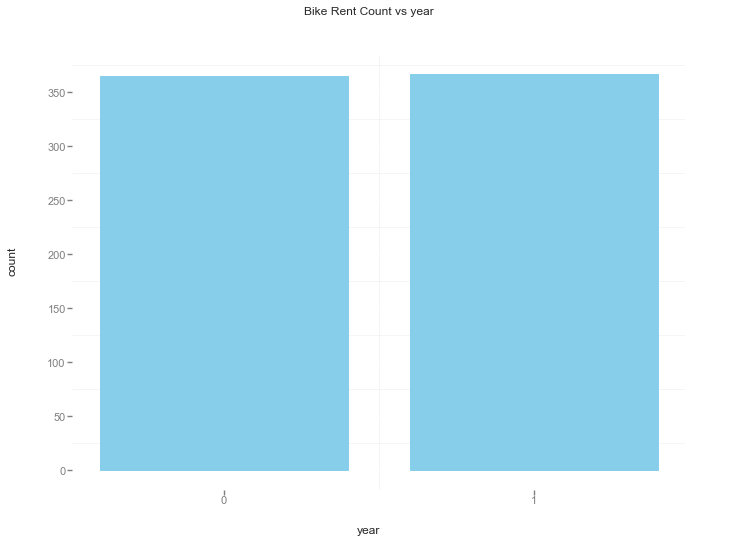

<ggplot: (-9223372036840138608)>

In [34]:
ggplot(Bike_Rent,aes(x='year',y='count'))+    geom_bar(fill="skyBlue")+    scale_color_brewer(type = 'diverging',palette=4)+    xlab("year")+ylab("count") + ggtitle("Bike Rent Count vs year")+ theme_bw()

In [35]:
# Bike rent count is high in season 3(fall) and low in season 1(springer)

# Year
print(Bike_Rent.groupby(['year'])['count'].sum())

year
0    1243103.0
1    2049576.0
Name: count, dtype: float64


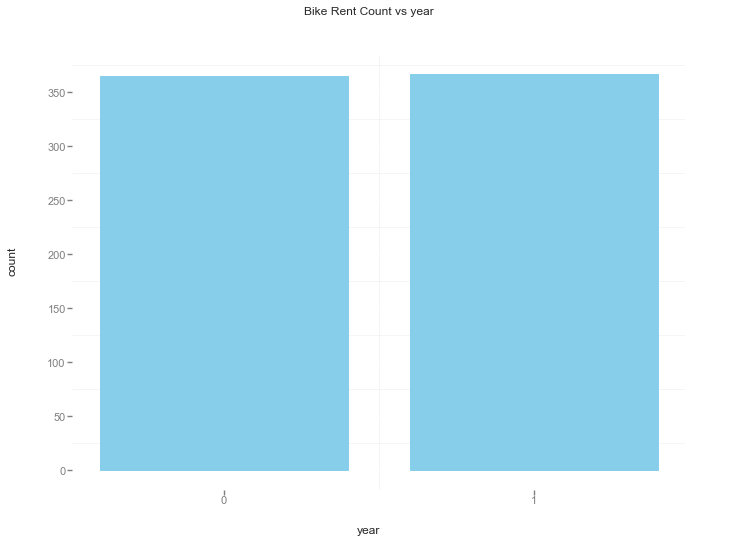

<ggplot: (-9223372036840060388)>

In [36]:
ggplot(Bike_Rent,aes(x='year',y='count'))+    geom_bar(fill="skyBlue")+    scale_color_brewer(type = 'diverging',palette=4)+    xlab("year")+ylab("count") + ggtitle("Bike Rent Count vs year")+ theme_bw()

In [37]:
# Bike rent count is high in year 1 (in 2012)

# month
print(Bike_Rent.groupby(['month'])['count'].sum())

month
1     134933.0
2     151352.0
3     228920.0
4     269094.0
5     331686.0
6     346342.0
7     344948.0
8     351194.0
9     345991.0
10    322352.0
11    254831.0
12    211036.0
Name: count, dtype: float64


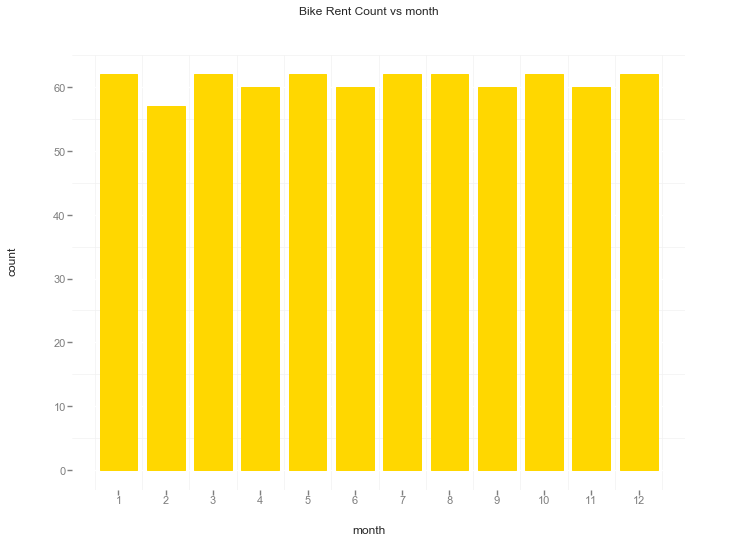

<ggplot: (-9223372036840543596)>

In [38]:
ggplot(Bike_Rent,aes(x='month',y='count'))+    geom_bar(fill="Gold",stat='sum')+    scale_color_brewer(type = 'diverging',palette=4)+    xlab("month")+ylab("count") + ggtitle("Bike Rent Count vs month")+ theme_bw()

In [39]:
# Bike rent count is high in month of august and low in jan

# holiday
print(Bike_Rent.groupby(['holiday'])['count'].sum())

holiday
0    3214244.0
1      78435.0
Name: count, dtype: float64


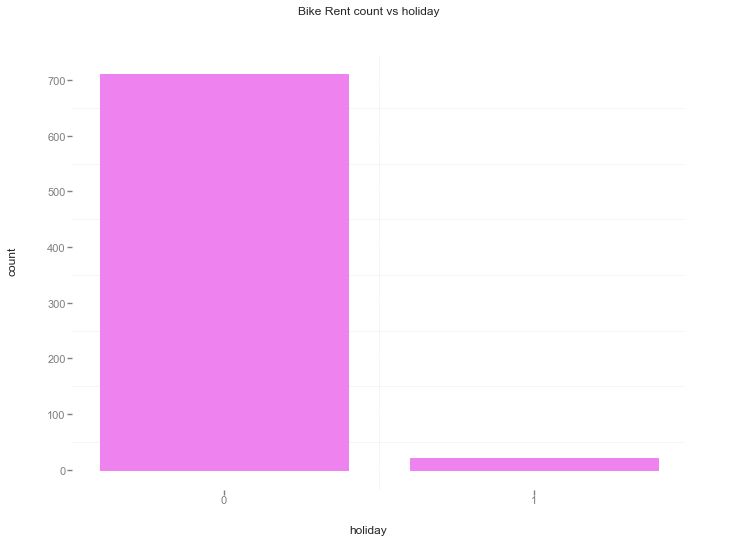

<ggplot: (-9223372036846238192)>

In [40]:
ggplot(Bike_Rent,aes(x='holiday',y='count'))+    geom_bar(fill="Violet")+    scale_color_brewer(type = 'diverging',palette=4)+    xlab("holiday")+ylab("count") + ggtitle("Bike Rent count vs holiday")+ theme_bw()

In [41]:
#  Bike rent count is high in holiday ie 0

# weekday
print(Bike_Rent.groupby(['weekday'])['count'].sum())

weekday
0    444027.0
1    455503.0
2    469109.0
3    473048.0
4    485395.0
5    487790.0
6    477807.0
Name: count, dtype: float64


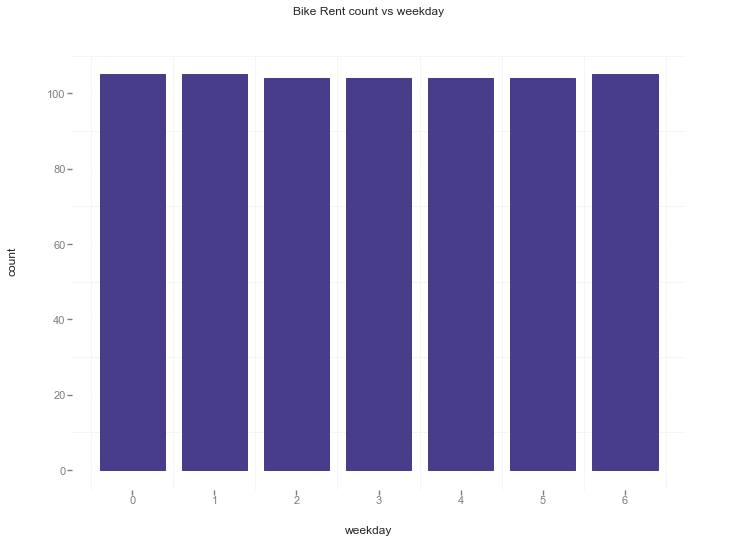

<ggplot: (-9223372036839732832)>

In [42]:
ggplot(Bike_Rent,aes(x='weekday',y='count'))+    geom_bar(fill="DarkSlateBlue")+    scale_color_brewer(type = 'diverging',palette=4)+    xlab("weekday")+ylab("count") + ggtitle("Bike Rent count vs weekday")+ theme_bw()

In [43]:
# From bar plot we can see maximum bikes rented on 5th day and least bikes on day 0.

# workingday
print(Bike_Rent.groupby(['workingday'])['count'].sum())

workingday
0    1000269.0
1    2292410.0
Name: count, dtype: float64


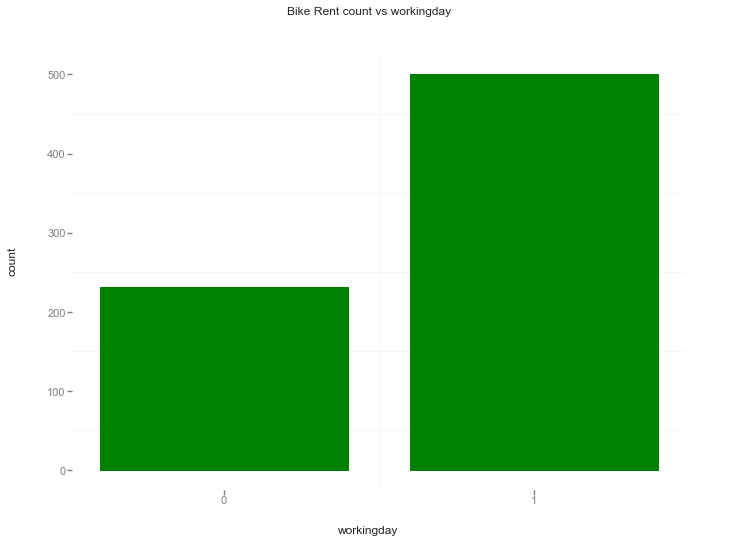

<ggplot: (-9223372036839764508)>

In [44]:
ggplot(Bike_Rent,aes(x='workingday',y='count'))+    geom_bar(fill="Green")+    scale_color_brewer(type = 'diverging',palette=4)+    xlab("workingday")+ylab("count") + ggtitle("Bike Rent count vs workingday")+ theme_bw()

In [45]:
# Bike rent count is high on working day  ie 1

# weather
print(Bike_Rent.groupby(['weather'])['count'].sum())

weather
1    2257952.0
2     996858.0
3      37869.0
Name: count, dtype: float64


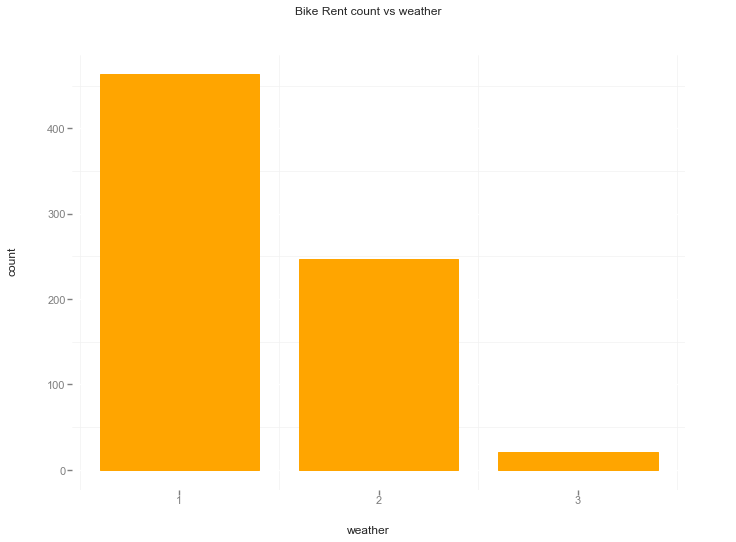

<ggplot: (-9223372036839644380)>

In [46]:
ggplot(Bike_Rent,aes(x='weather',y='count'))+    geom_bar(fill="Orange")+    scale_color_brewer(type = 'diverging',palette=4)+    xlab("weather")+ylab("count") + ggtitle("Bike Rent count vs weather")+ theme_bw()

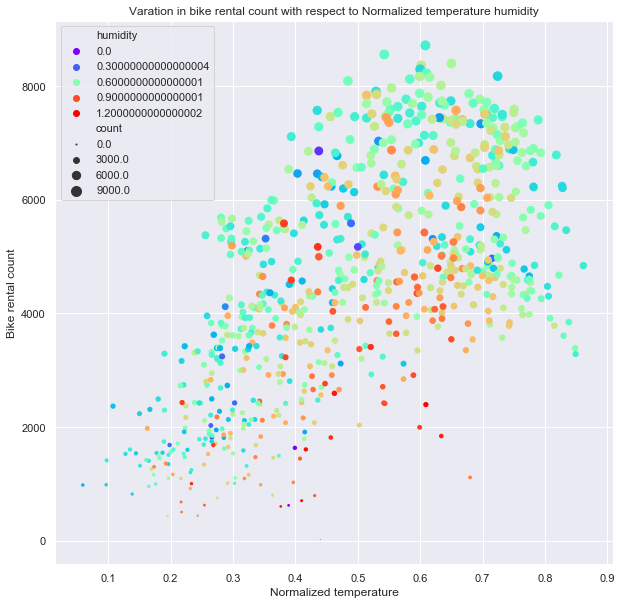

In [47]:
# Bike rent count is high on weather 1: ie when the weather is 
# Clear, Few clouds, Partly cloudy, Partly cloudy

# Lets check impact of continous variables on target variable
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="temperature", y="count",
                hue="humidity", size="count",
                palette="rainbow",sizes=(1, 100), linewidth=0,
                data=Bike_Rent,ax=ax)
plt.title("Varation in bike rental count with respect to Normalized temperature humidity")
plt.ylabel("Bike rental count")
plt.xlabel("Normalized temperature")
plt.savefig('bike_temp&humidity_plot.pdf')

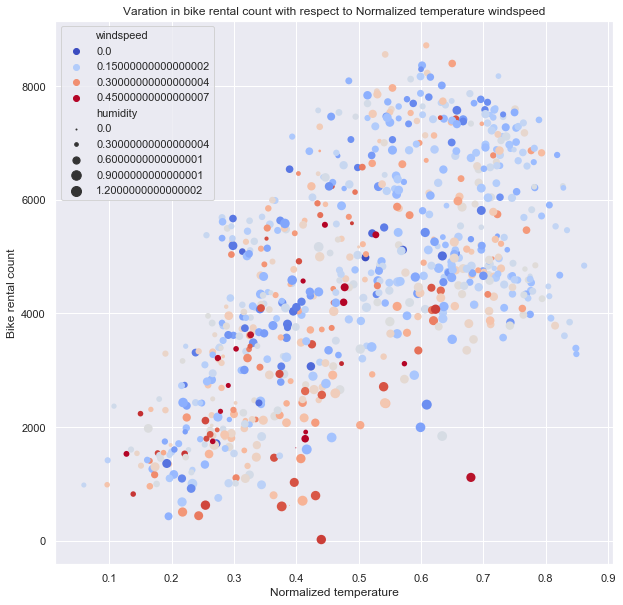

In [48]:
#*From the plot we can see that count is maximum when temprature 0.4 to 0.7 and humidity below 0.75.

f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="temperature", y="count",
                hue="windspeed", size="humidity",
                palette="coolwarm",sizes=(1, 100), linewidth=0,
                data=Bike_Rent,ax=ax)
plt.title("Varation in bike rental count with respect to Normalized temperature windspeed")
plt.ylabel("Bike rental count")
plt.xlabel("Normalized temperature")
plt.savefig('bike_temp&windspeed_plot.pdf')

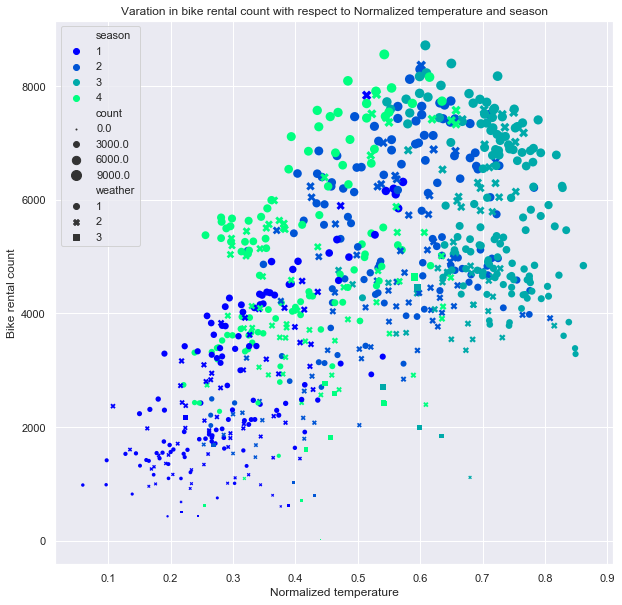

In [49]:
#*From the above plot we can see bike count is maximum between temp 0.5 to 0.7, windspped below 0.15 and humidity less than 0.75

f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="temperature", y="count",
                hue="season", size="count",style= "weather",
                palette="winter",sizes=(1, 100), linewidth=0,
                data=Bike_Rent,ax=ax)
plt.title("Varation in bike rental count with respect to Normalized temperature and season")
plt.ylabel("Bike rental count")
plt.xlabel("Normalized temperature")
plt.savefig('bike_temp&season_plot.pdf')

In [50]:
#*From figure it is clear that maximum bike count is for season 2 and 3, when the temp between 0.5 to 0.7, and weather was 1 and 2

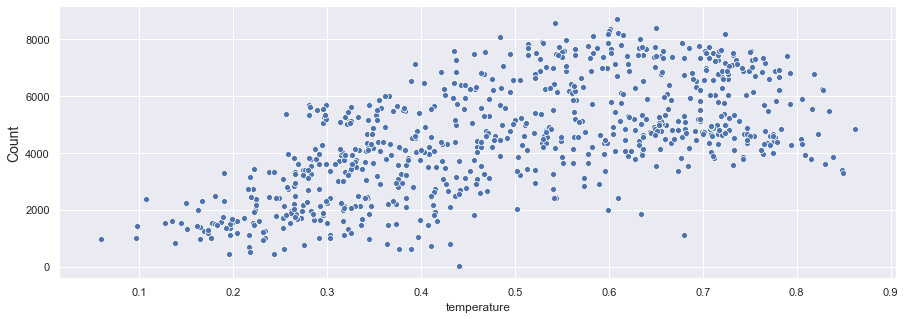

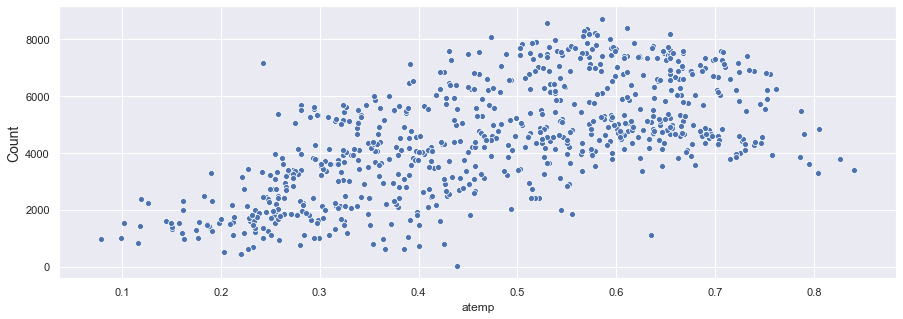

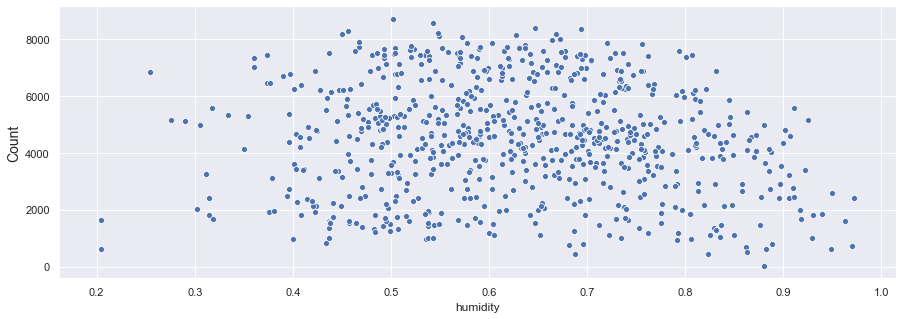

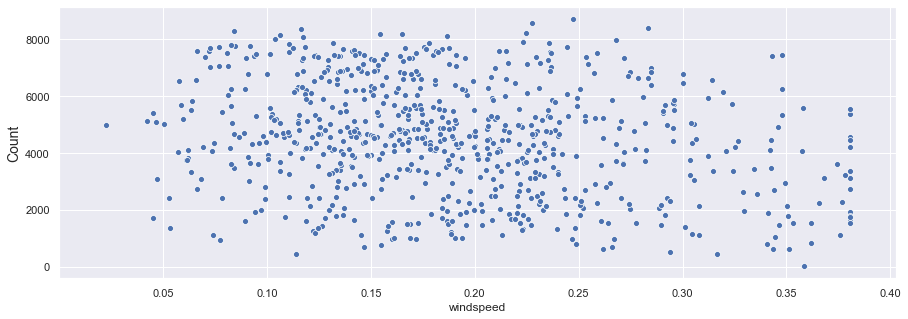

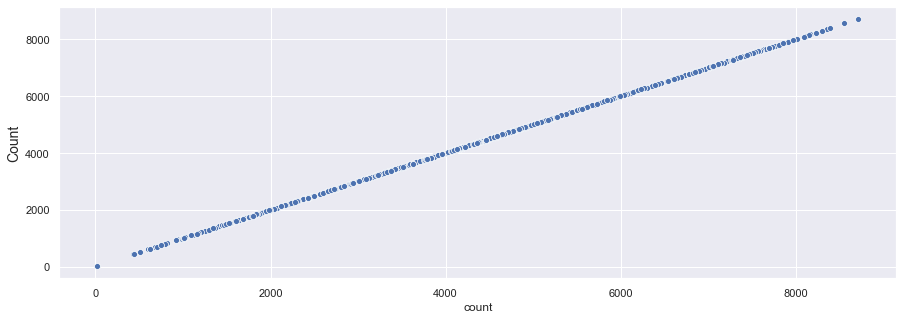

In [51]:
# Bi-variate Analysis using Scatter plots:

# Bi-variate Analysis: 
# Here one variable is independent while other one is dependent.So, here count is dependent variable and rest all variables are independent variables.
# let'scheck scatter plot for the variables with count how are they co-rrelated.

for i in cnames:
    sns.set(rc={'figure.figsize':(15,5)})
    ax = sns.scatterplot(x=Bike_Rent[i], y="count", data=Bike_Rent)
    #plt.title(cnames1[i], fontsize=14)
    #plt.xlabel(cnames1[i], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()

In [52]:
# Feature Selection  :
Bike_Rent.shape

Bike_Rent.dtypes

print(Bike_Rent.columns)

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temperature', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')


In [53]:
# Correlation analysis
# Using corrplot library we do correlation analysis for numeric variables
# Lets recall numeric variabls and derive correlation matrix and plot

# Continous Variables 
cnames= ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

In [54]:
# Correlation matrix 
# Extract only numeric variables in dataframe for correlation
df_corr= Bike_Rent.loc[:,cnames]

In [55]:
# Generate correlation matrix
corr_matrix = df_corr.corr()
(print(corr_matrix))

             temperature     atemp  humidity  windspeed     count
temperature     1.000000  0.991702  0.126722  -0.156916  0.627494
atemp           0.991702  1.000000  0.139924  -0.182948  0.631066
humidity        0.126722  0.139924  1.000000  -0.241160 -0.105664
windspeed      -0.156916 -0.182948 -0.241160   1.000000 -0.233657
count           0.627494  0.631066 -0.105664  -0.233657  1.000000


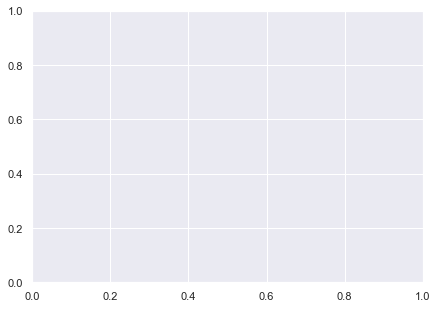

In [56]:
# Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

Text(0.5, 1.0, 'Correlation Plot of Continous Variables')

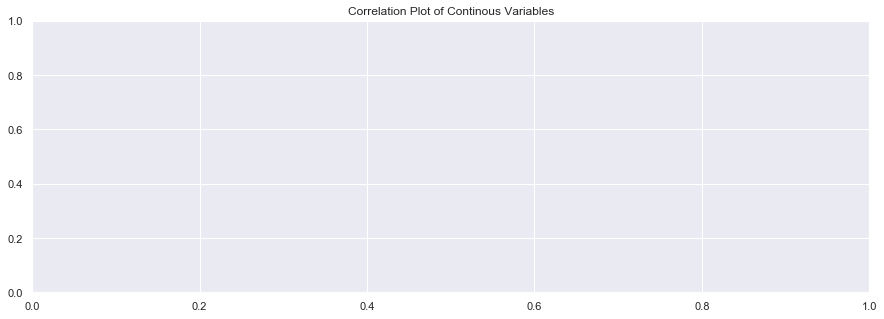

In [57]:
#Plot using seaborn library
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

plt.title("Correlation Plot of Continous Variables")

In [58]:
# From correlation analysis temp and atemp variables are highly correlated 
# so delete atemp variable 

In [59]:
# Categorical variables-
cat_cnames=['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather']

In [60]:
# Lets find significant categorical variables usig ANOVA test 
# Anova analysis for categorical variable with target numeric variable

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in cat_cnames:
    mod = ols('count' + '~' + i, data = Bike_Rent).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
year      8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
month     2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                sum_sq     df          F   

In [61]:
# From the anova result, we can observe working day,weekday and holiday has p value > 0.05, so delete this variable not consider in model.

In [62]:
# Dimension reduction

Bike_Rent = Bike_Rent.drop(['atemp','holiday','weekday','workingday'], axis=1)


In [63]:
# Lets check dimensions after dimension reduction 
Bike_Rent.shape

(731, 8)

In [64]:
# Lets check column names after dimension reduction 
Bike_Rent.columns

Bike_Rent.head()

,season,year,month,weather,temperature,humidity,windspeed,count
0,1,0,1,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,1,0.226957,0.436957,0.186900,1600.0


In [65]:
# Lets define/update  continous and categorical variables after dimension reduction
# Continuous variable
cnames = ['temperature','humidity', 'windspeed', 'count']

In [66]:
# Categorical variables
cat_cnames = ['season', 'year', 'month','weather']

temperature


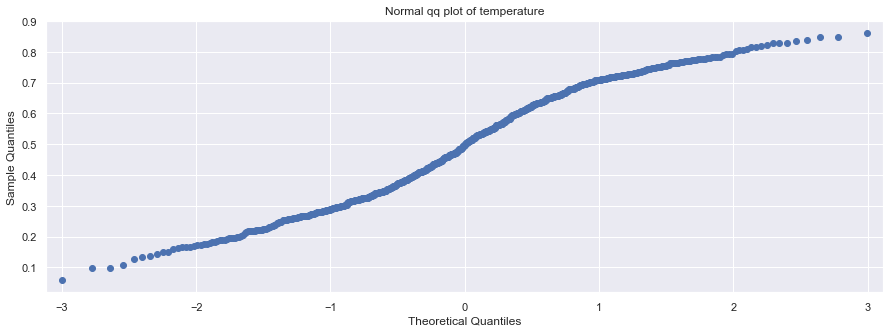

humidity


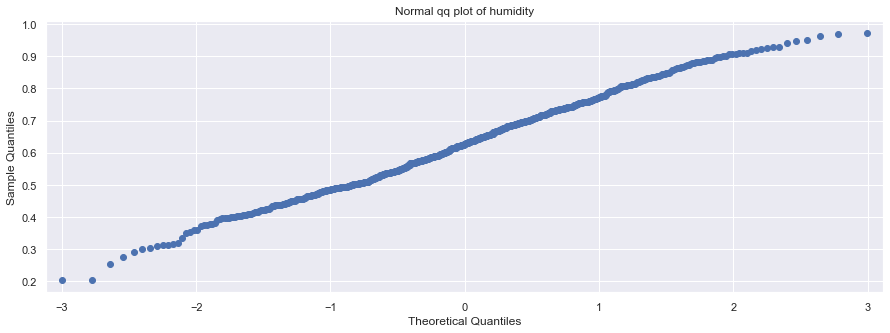

windspeed


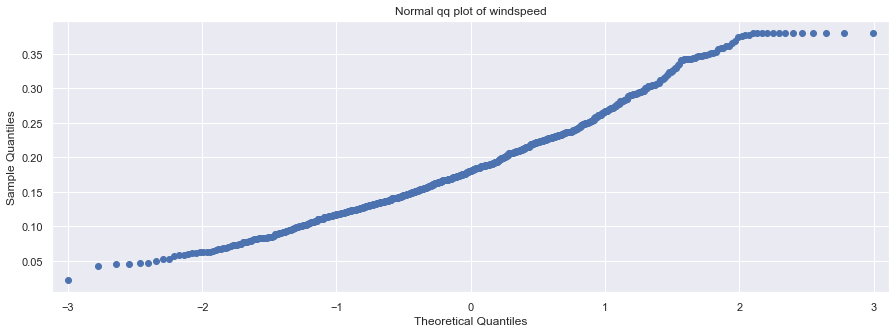

count


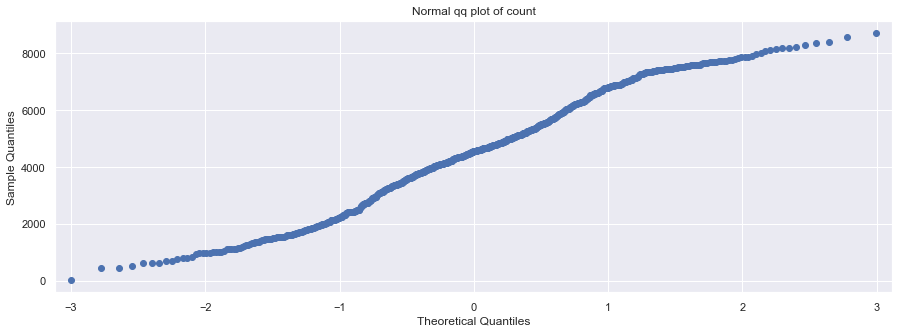

temperature


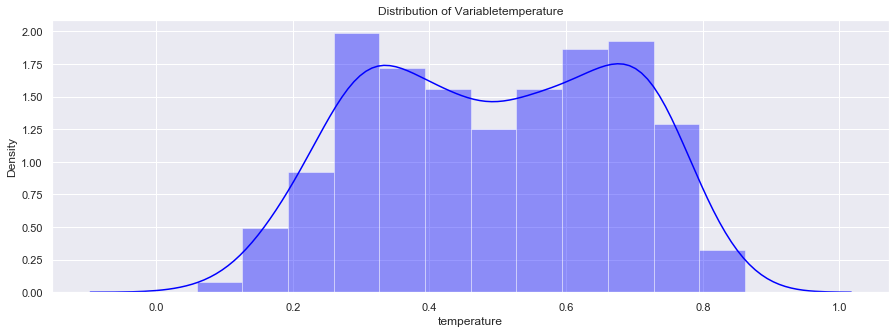

humidity


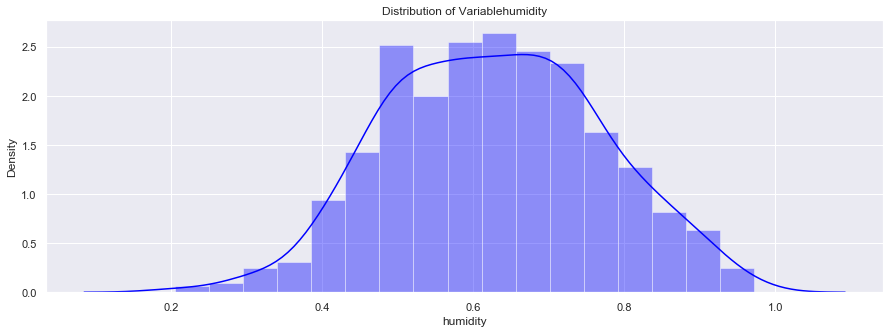

windspeed


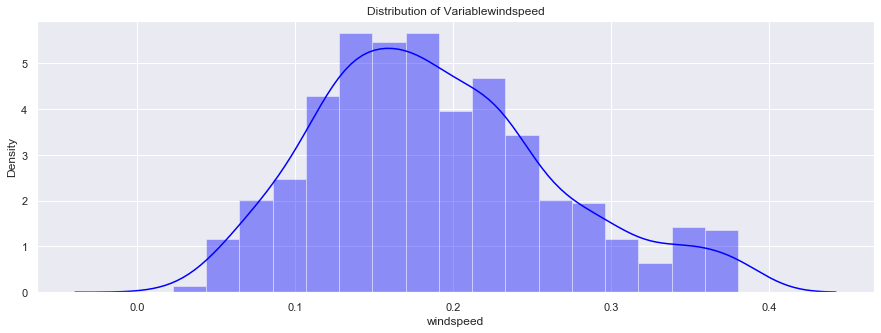

count


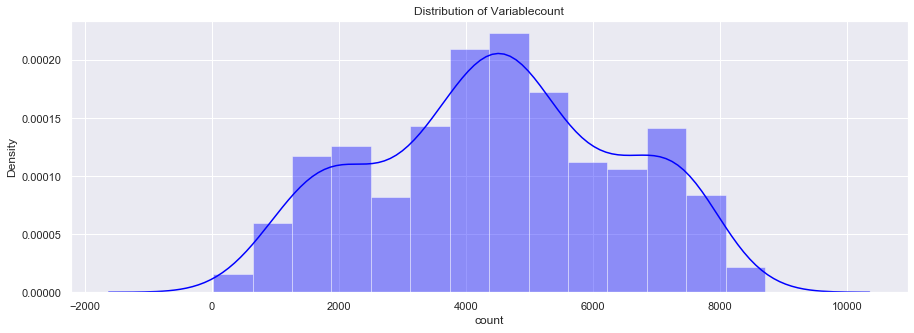

,season,year,month,weather,temperature,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.628197,0.189846,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.141320,0.075644,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.204687,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.380611,8714.000000


In [67]:
# Feature Scaling

# Since as it is mentioned in data dictionary the values of 
# temp,humidity,windspeed variables are already normalized values 
# So no need to go for feature scaling instead we will visualize the variables 
# to see normality  

# Normality Check

for i in cnames:
    print(i)
    sm.qqplot(Bike_Rent[i])
    plt.title("Normal qq plot of " +i)
    plt.show()

for i in cnames:
    print(i)
    sns.distplot(Bike_Rent[i],bins='auto',color='blue')
    plt.title("Distribution of Variable"+i)
    plt.ylabel("Density")
    plt.show()

Bike_Rent.loc[:,'count'] = Bike_Rent.loc[:,'count'].round()
Bike_Rent.describe()

In [68]:
# from distribution plot,normal qq plot  and summary  it is clear that data is already normalized.

Bike_Rent.dtypes

season           int64
year             int64
month            int64
weather          int64
temperature    float64
humidity       float64
windspeed      float64
count          float64
dtype: object

In [69]:
# MODEL DEVELOPMENT
# Load Required libraries for model development For Machine learning 

from sklearn.model_selection import train_test_split #used to split dataset into train and test

from sklearn.metrics import mean_squared_error # used to calculate MSE

from sklearn.metrics import r2_score # used to calculate r square

from sklearn.linear_model import LinearRegression # For linear regression

from sklearn.tree import DecisionTreeRegressor # For Decision Tree

from sklearn.ensemble import RandomForestRegressor # For RandomForest

from sklearn import metrics

In [70]:
# Lets convert all categorical variables ito dummy variables 
# As we cant pass categorical variables directly in to regression problems
# Lets save our preprocessed data into df data set 

df1 = Bike_Rent
Bike_Rent = df1

In [71]:
# Lets call Categorical varaibles after feature selection using ANOVA 
cat_cnames = ['season', 'year', 'month','weather']

In [72]:
#  Create categorical variables to dummy variables-
#Bike_Rent = pd.get_dummies(Bike_Rent,columns=cat_cnames)
Bike_Rent.head()

,season,year,month,weather,temperature,humidity,windspeed,count
0,1,0,1,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,1,0.226957,0.436957,0.186900,1600.0


In [74]:
# Before developing the model lets check the dimensions of data 
Bike_Rent.shape

Bike_Rent.head()

Bike_Rent.columns

Index(['season', 'year', 'month', 'weather', 'temperature', 'humidity',
       'windspeed', 'count'],
      dtype='object')

In [75]:
# Lets Divide the data into train and test set 
# Split data for predictor and target seperatly
X= Bike_Rent.drop(['count'],axis=1)
y= Bike_Rent['count']

In [76]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( Bike_Rent.iloc[:, Bike_Rent.columns != 'count'], 
                         Bike_Rent.iloc[:, 0], test_size = 0.20, random_state = 1)

In [77]:
# Now Split the data into train and test using train_test_split function
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 7)
(147, 7)
(584,)
(147,)


In [79]:
# Function for Error metrics to calculate the performance of model
def MAPE(y_true,y_prediction):
    mape= np.mean(np.abs(y_true-y_prediction)/y_true)*100
    return mape

In [80]:
# Before building multiple linear regression model lets check the 
# vif for multicolinearity
# continous variables after feature selection using correlation analysis 

In [81]:
# Import VIF function from statmodels Library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Get variables for which to compute VIF and add intercept term:

X = Bike_Rent[["temperature","humidity","windspeed"]].dropna() #subset the dataframe
X ['Intercept'] = 1

In [83]:
# Compute and view VIF:

vif = pd.DataFrame()           # Create an empty dataframe
vif["Variables"] = X.columns   # Add "Variables" column to empty dataframe
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [84]:
# View results using print
print(vif)

     Variables        VIF
0  temperature   1.034137
1     humidity   1.070959
2    windspeed   1.080362
3    Intercept  41.553921


In [85]:
# None of the variables from the 3 input variables has collinearity problem.

In [86]:
# Linear Regression Model  :

# Import libraries
import statsmodels.api as sm

In [87]:
# Linear Regression model for regression 
LR_model= sm.OLS(y_train,X_train).fit()
print(LR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              2054.
Date:                Thu, 30 Jan 2020   Prob (F-statistic):                        0.00
Time:                        21:07:58   Log-Likelihood:                         -4841.7
No. Observations:                 584   AIC:                                      9697.
Df Residuals:                     577   BIC:                                      9728.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [88]:
# Model prediction on  on train data
LR_train= LR_model.predict(X_train)

In [89]:
# Model prediction on test data
LR_test= LR_model.predict(X_test)

In [90]:
# Model performance on train data
MAPE_train= MAPE(y_train,LR_train)

In [91]:
# Model performance on test data
MAPE_test= MAPE(y_test,LR_test)

In [92]:
# r2 value for train data
r2_train= r2_score(y_train,LR_train)

In [93]:
# r2 value for test data-
r2_test=r2_score(y_test,LR_test)

In [94]:
# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,LR_train))

In [95]:
# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,LR_test))

In [96]:
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))
print("Accuracy :="+str(100-MAPE_test))

Error_Metrics = {'Model Name': ['Linear Regression'],'Accuracy':[100-MAPE_test],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}

Mean Absolute Precentage Error for train data=60.91370688106987
Mean Absolute Precentage Error for test data=17.58251807554293
R^2_score for train data=0.7592105114682316
R^2_score for test data=0.8088326502746627
RMSE for train data=964.5861875990771
RMSE for test data=792.4255089937532
Accuracy :=82.41748192445706


In [97]:
LR_Results = pd.DataFrame(Error_Metrics)

LR_Results


,Model Name,Accuracy,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Linear Regression,82.417482,60.913707,17.582518,0.759211,0.808833,964.586188,792.425509


In [98]:
# Lets build some more models using different ml algorithms for more accuracy 
# and less prediction error

In [99]:
# Desicision Tree

# Lets Build decision tree model on train data
# Import libraries
from sklearn.tree import DecisionTreeRegressor

In [100]:
# Decision tree for regression
DT_model= DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

In [101]:
# Model prediction on train data
DT_train= DT_model.predict(X_train)

In [102]:
# Model prediction on test data
DT_test= DT_model.predict(X_test)

In [103]:
# Model performance on train data
MAPE_train= MAPE(y_train,DT_train)

In [104]:
# Model performance on test data
MAPE_test= MAPE(y_test,DT_test)

In [105]:
# r2 value for train data
r2_train= r2_score(y_train,DT_train)

In [106]:
# r2 value for test data
r2_test=r2_score(y_test,DT_test)

In [107]:
# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,DT_train))

In [108]:
# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,DT_test))

In [109]:
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str(RMSE_train))
print("RMSE for test data="+str(RMSE_test))
print("Accuracy :="+str(100-MAPE_test))

Error_metrics_DT= {'Model Name': ['Decision Tree'],'Accuracy':[100-MAPE_test],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}

Mean Absolute Precentage Error for train data=80.87415784352679
Mean Absolute Precentage Error for test data=26.70531809596634
R^2_score for train data=0.6853648861225012
R^2_score for test data=0.6659645942279593
RMSE for train data=1102.62001385741
RMSE for test data=1047.4850631844804
Accuracy :=73.29468190403367


In [110]:
DT_Results = pd.DataFrame(Error_metrics_DT)

DT_Results

,Model Name,Accuracy,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Decision Tree,73.294682,80.874158,26.705318,0.685365,0.665965,1102.620014,1047.485063


In [111]:
# Random Search CV In Decision Tree 

# Import libraries 
from sklearn.model_selection import RandomizedSearchCV

RandomDecisionTree = DecisionTreeRegressor(random_state = 0)
depth = list(range(1,20,2))
random_search = {'max_depth': depth}

In [112]:
# Lets build a model using above parameters on train data 
RDT_model= RandomizedSearchCV(RandomDecisionTree,param_distributions= random_search,n_iter=5,cv=5)
RDT_model= RDT_model.fit(X_train,y_train)

In [113]:
# Lets look into best fit parameters
best_parameters = RDT_model.best_params_
print(best_parameters)

{'max_depth': 7}


In [114]:
# Again rebuild decision tree model using randomsearch best fit parameter ie
# with maximum depth = 5
RDT_best_model = RDT_model.best_estimator_

In [115]:
# Prediction on train data 
RDT_train = RDT_best_model.predict(X_train)

In [116]:
# Prediction on test data 
RDT_test = RDT_best_model.predict(X_test)

In [117]:
# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value

# MAPE for train data 
MAPE_train= MAPE(y_train,RDT_train)

In [118]:
# MAPE for test data 
MAPE_test= MAPE(y_test,RDT_test)

In [119]:
# Rsquare for train data
r2_train= r2_score(y_train,RDT_train)

In [120]:
# Rsquare for test data
r2_test=r2_score(y_test,RDT_test)

In [121]:
# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RDT_train))

In [122]:
# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RDT_test))

In [123]:
# Lets print the results 
print("Best Parameter="+str(best_parameters))
print("Best Model="+str(RDT_best_model))

Best Parameter={'max_depth': 7}
Best Model=DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


In [124]:
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))
print("Accuracy :="+str(100-MAPE_test))

Error_metrics_RDT= {'Model Name': ['Decision Tree Random Search CV'],'Accuracy':[100-MAPE_test],'MAPE_Train':[MAPE_train],
                    'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],'R-squared_Test':[r2_test],
                    'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}

Mean Absolute Precentage Error for train data=7.756255498347202
Mean Absolute Precentage Error for test data=16.109346700830333
R^2_score for train data=0.9453824605922994
R^2_score for test data=0.7499890687073929
RMSE for train data=459.3971980085692
RMSE for test data=906.2146666740604
Accuracy :=83.89065329916967


In [125]:
RDT_Results = pd.DataFrame(Error_metrics_RDT)

RDT_Results

,Model Name,Accuracy,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Decision Tree Random Search CV,83.890653,7.756255,16.109347,0.945382,0.749989,459.397198,906.214667


In [126]:
# Grid Search CV in Decision Tree

# Import libraries
from sklearn.model_selection import GridSearchCV

In [127]:
GridDecisionTree= DecisionTreeRegressor(random_state=0)
depth= list(range(1,20,2))
grid_search= {'max_depth':depth}

In [128]:
# Lets build a model using above parameters on train data
GDT_model= GridSearchCV(GridDecisionTree,param_grid=grid_search,cv=5)
GDT_model= GDT_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [129]:
# Lets look into best fit parameters from gridsearch cv DT
best_parameters = GDT_model.best_params_
print(best_parameters)

{'max_depth': 5}


In [130]:
# Again rebuild decision tree model using gridsearch best fit parameter ie
# with maximum depth = 5
GDT_best_model = GDT_model.best_estimator_

In [131]:
# Prediction on train data 
GDT_train = GDT_best_model.predict(X_train)

In [132]:
# Prediction on train data  test data-
GDT_test = GDT_best_model.predict(X_test)

In [133]:
# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value

# MAPE for train data 
MAPE_train= MAPE(y_train,GDT_train)

In [134]:
# MAPE for test data 
MAPE_test= MAPE(y_test,GDT_test)

In [135]:
# Rsquare for train data
r2_train= r2_score(y_train,GDT_train)

In [136]:
# Rsquare for train data
r2_test=r2_score(y_test,GDT_test)

In [137]:
# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,GDT_train))

In [138]:
# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GDT_test))

In [139]:
print("Best Parameter="+str(best_parameters))
print("Best Model="+str(GDT_best_model))

Best Parameter={'max_depth': 5}
Best Model=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


In [140]:
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))
print("Accuracy :="+str(100-MAPE_test))

Mean Absolute Precentage Error for train data=14.851214174909774
Mean Absolute Precentage Error for test data=15.610804357332775
R^2_score for train data=0.8786291584226629
R^2_score for test data=0.8681832629161632
RMSE for train data=684.8247668122183
RMSE for test data=658.0166251056304
Accuracy :=84.38919564266723


In [141]:
Error_metrics_GDT= {'Model Name': ['Decision Tree Grid Search CV'],'Accuracy':[100-MAPE_test],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
GDT_Results = pd.DataFrame(Error_metrics_GDT)

In [142]:
GDT_Results

,Model Name,Accuracy,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Decision Tree Grid Search CV,84.389196,14.851214,15.610804,0.878629,0.868183,684.824767,658.016625


In [143]:
# Random Forest 

# Import libraris
from sklearn.ensemble import RandomForestRegressor

In [144]:
# Random Forest for regression
RF_model= RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

In [145]:
# Prediction on train data
RF_train= RF_model.predict(X_train)

In [146]:
# Prediction on test data
RF_test= RF_model.predict(X_test)

In [147]:
# MAPE For train data
MAPE_train= MAPE(y_train,RF_train)

In [148]:
# MAPE For test data
MAPE_test= MAPE(y_test,RF_test)

In [149]:
# Rsquare  For train data
r2_train= r2_score(y_train,RF_train)

In [150]:
# Rsquare  For test data
r2_test=r2_score(y_test,RF_test)

In [151]:
# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RF_train))

In [152]:
# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RF_test))

In [153]:
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))
print("Accuracy :="+str(100-MAPE_test))

Mean Absolute Precentage Error for train data=17.361107534866544
Mean Absolute Precentage Error for test data=12.870558402064683
R^2_score for train data=0.9811080025234831
R^2_score for test data=0.9112243962089515
RMSE for train data=270.1849885992624
RMSE for test data=540.0057760865182
Accuracy :=87.12944159793531


In [154]:
# Lets print results of Randomforest random search
Error_metrics_RF= {'Model Name': ['Random Forest'],'Accuracy':[100-MAPE_test],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
RF_Results = pd.DataFrame(Error_metrics_RF)

RF_Results

,Model Name,Accuracy,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Random Forest,87.129442,17.361108,12.870558,0.981108,0.911224,270.184989,540.005776


In [155]:
# Random Search CV in Random Forest 

# Import libraries
from sklearn.model_selection import RandomizedSearchCV

In [156]:
RandomRandomForest = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,100,2))
depth = list(range(1,20,2))
random_search = {'n_estimators':n_estimator, 'max_depth': depth}

In [157]:
# Lets build a model using above parameters on train data
RRF_model= RandomizedSearchCV(RandomRandomForest,param_distributions= random_search,n_iter=5,cv=5)
RRF_model= RRF_model.fit(X_train,y_train)

In [158]:
# Best parameters for model
best_parameters = RRF_model.best_params_
print(best_parameters)

{'n_estimators': 97, 'max_depth': 13}


In [159]:
# Again rebuild random forest  model using gridsearch best fit parameter ie {'n_estimators': 43, 'max_depth': 7}
RRF_best_model = RRF_model.best_estimator_

In [160]:
# Prediction on train data
RRF_train = RRF_best_model.predict(X_train)

In [161]:
# Prediction on test data
RRF_test = RRF_best_model.predict(X_test)

In [162]:
# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value

# MAPE for train data 
MAPE_train= MAPE(y_train,RRF_train)

In [163]:
# MAPE for test data
MAPE_test= MAPE(y_test,RRF_test)

In [164]:
# Rsquare for train data
r2_train= r2_score(y_train,RRF_train)

In [165]:
# Rsquare for test data
r2_test=r2_score(y_test,RRF_test)

In [166]:
# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RRF_train))

In [167]:
# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RRF_test))

In [168]:
print("Best Parameter="+str(best_parameters))
print("Best Model="+str(RRF_best_model))

Best Parameter={'n_estimators': 97, 'max_depth': 13}
Best Model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=97,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)


In [169]:
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))
print("Accuracy :="+str(100-MAPE_test))

Mean Absolute Precentage Error for train data=18.880056981146765
Mean Absolute Precentage Error for test data=12.551274103081877
R^2_score for train data=0.9801656496123824
R^2_score for test data=0.9163496006442785
RMSE for train data=276.8415468367835
RMSE for test data=524.1862167394216
Accuracy :=87.44872589691812


In [170]:
# Lets print results of Randomforest random search
Error_metrics_RRF= {'Model Name': ['Random Forest Random Search CV'],'Accuracy':[100-MAPE_test],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
RRF_results = pd.DataFrame(Error_metrics_RRF)

In [171]:
RRF_results

,Model Name,Accuracy,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Random Forest Random Search CV,87.448726,18.880057,12.551274,0.980166,0.91635,276.841547,524.186217


In [172]:
# Grid search CV in Random Forest 

# Import libraries
from sklearn.model_selection import GridSearchCV

In [173]:
GridRandomForest= RandomForestRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth= list(range(1,20,2))
grid_search= {'n_estimators':n_estimator, 'max_depth': depth}

In [174]:
# Lets build a model using above parameters on train data using random forest grid search cv 
GRF_model= GridSearchCV(GridRandomForest,param_grid=grid_search,cv=5)
GRF_model= GRF_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [183]:
# Best fit parameters for model
best_parameters_GRF = GRF_model.best_params_
print(best_parameters_GRF)

{'max_depth': 19, 'n_estimators': 19}


In [184]:
# Again rebuild random forest model using gridsearch best fit parameter {'max_depth': 7, 'n_estimators': 11}
GRF_best_model = GRF_model.best_estimator_


In [185]:
# Prediction on train data
GRF_train = GRF_best_model.predict(X_train)

In [188]:
# Prediction on test data
GRF_test = GRF_best_model.predict(X_test)

In [189]:
# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value

# MAPE for train data
MAPE_train= MAPE(y_train,GRF_train)

In [190]:
# MAPE for test data
MAPE_test = MAPE(y_test,GRF_test)

In [191]:
# Rsquare for train data
r2_train= r2_score(y_train,GRF_train)

In [192]:
# Rsquare for test data
r2_test=r2_score(y_test,GRF_test)

In [193]:
# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,GRF_train))

In [194]:
# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GRF_test))

In [195]:
print("Best Parameter="+str(best_parameters))
print("Best Model="+str(GRF_best_model))

Best Parameter={'n_estimators': 97, 'max_depth': 13}
Best Model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=19,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)


In [196]:
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))
print("Accuracy :="+str(100-MAPE_test))

Mean Absolute Precentage Error for train data=18.457111160204875
Mean Absolute Precentage Error for test data=12.641852477627868
R^2_score for train data=0.9765493557551477
R^2_score for test data=0.9154836973210035
RMSE for train data=301.0229904145778
RMSE for test data=526.8922768043273
Accuracy :=87.35814752237214


In [197]:
# Lets print results of Randomforest grid search cv
Error_metrics_GRF= {'Model Name': ['Random Forest Grid Search CV'],'Accuracy':[100-MAPE_test],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
GRF_results = pd.DataFrame(Error_metrics_GRF)

GRF_results

,Model Name,Accuracy,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Random Forest Grid Search CV,87.358148,18.457111,12.641852,0.976549,0.915484,301.02299,526.892277


In [198]:
# Gradient Boosting 

# Import libraries
from sklearn.ensemble import GradientBoostingRegressor

In [199]:
# Lets build a Gradient Boosting model for regression problem
GB_model = GradientBoostingRegressor().fit(X_train, y_train)

In [200]:
# Model prediction on train data
GB_train= GB_model.predict(X_train)

In [201]:
# Model prediction on test data
GB_test= GB_model.predict(X_test)

In [202]:
# Model performance on train data
MAPE_train= MAPE(y_train,GB_train)

In [203]:
# Model performance on test data
MAPE_test= MAPE(y_test,GB_test)

In [204]:
# Rsquare value for train data
r2_train= r2_score(y_train,GB_train)

In [205]:
# Rsquare value for test data
r2_test=r2_score(y_test,GB_test)

In [206]:
# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,GB_train))

In [207]:
# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GB_test))

In [208]:
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))
print("Accuracy :="+str(100-MAPE_test))

Mean Absolute Precentage Error for train data=12.267863532674374
Mean Absolute Precentage Error for test data=11.483329395973298
R^2_score for train data=0.9438714713984231
R^2_score for test data=0.9174945578050349
RMSE for train data=465.70843641054495
RMSE for test data=520.5864811798882
Accuracy :=88.5166706040267


In [209]:
# Lets print the result 
Error_metrics_GB = {'Model Name': ['Gradient Boosting'],'Accuracy':[100-MAPE_test],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
GB_results = pd.DataFrame(Error_metrics_GB)

GB_results 

,Model Name,Accuracy,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Gradient Boosting,88.516671,12.267864,11.483329,0.943871,0.917495,465.708436,520.586481


In [210]:
# Random Search CV in Gradient Boosting 

# Import libraries
from sklearn.model_selection import RandomizedSearchCV

In [211]:
RandomGradientBoosting = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,100,2))
depth = list(range(1,20,2))
random_search = {'n_estimators':n_estimator, 'max_depth': depth}

In [212]:
# Lets build a model using above parameters on train data
RGB_model= RandomizedSearchCV(RandomGradientBoosting,param_distributions= random_search,n_iter=5,cv=5)
RGB_model= RGB_model.fit(X_train,y_train)

In [213]:
# Best parameters for model
best_parameters = RGB_model.best_params_
print(best_parameters)

{'n_estimators': 43, 'max_depth': 7}


In [214]:
# Again rebuild random forest model using gridsearch best fit parameter {'n_estimators': 81, 'max_depth': 5}
RGB_best_model = RGB_model.best_estimator_

In [215]:
# Prediction on train data
RGB_train = RGB_best_model.predict(X_train)

In [216]:
# Prediction on test data
RGB_test = RGB_best_model.predict(X_test)

In [217]:
# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value

# MAPE for train data
MAPE_train= MAPE(y_train,RGB_train)

In [218]:
# MAPE for test data
MAPE_test= MAPE(y_test,RGB_test)

In [219]:
# Rsquare for train data
r2_train= r2_score(y_train,RGB_train)

In [220]:
# Rsquare for test data
r2_test=r2_score(y_test,RGB_test)

In [221]:
# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,LR_train))

In [222]:
# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,LR_test))

In [223]:
print("Best Parameter="+str(best_parameters))
print("Best Model="+str(RGB_best_model))

Best Parameter={'n_estimators': 43, 'max_depth': 7}
Best Model=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=43,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)


In [224]:
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))
print("Accuracy :="+str(100-MAPE_test))

Mean Absolute Precentage Error for train data=4.016140846063928
Mean Absolute Precentage Error for test data=12.64717933129299
R^2_score for train data=0.9936369661759207
R^2_score for test data=0.8992847030914164
RMSE for train data=964.5861875990771
RMSE for test data=792.4255089937532
Accuracy :=87.35282066870701


In [225]:
Error_metrics_RGB= {'Model Name': ['Gradient Boosting Random Search CV'],'Accuracy':[100-MAPE_test],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],
      'R-squared_Train':[r2_train],'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
RGB_results = pd.DataFrame(Error_metrics_RGB)

RGB_results

,Model Name,Accuracy,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Gradient Boosting Random Search CV,87.352821,4.016141,12.647179,0.993637,0.899285,964.586188,792.425509


In [226]:
# Grid Search CV in Gradient Boosting

# Import libraries
from sklearn.model_selection import GridSearchCV

In [227]:
GridGradientBoosting= GradientBoostingRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth= list(range(1,20,2))
grid_search= {'n_estimators':n_estimator, 'max_depth': depth}

In [228]:
# Lets build a model using above parameters on train data(Grind Random Forest)
GGB_model= GridSearchCV(GridGradientBoosting,param_grid=grid_search,cv=5)
GGB_model= GGB_model.fit(X_train,y_train)

In [229]:
# Best parameters for model
best_parameters = GGB_model.best_params_
print(best_parameters)

{'max_depth': 5, 'n_estimators': 19}


In [230]:
# Again rebuild random forest model using gridsearch best fit parameter {'max_depth': 5, 'n_estimators': 19 }
GGB_best_model = GGB_model.best_estimator_

In [231]:
# Prediction on train data
GGB_train = GGB_best_model.predict(X_train)

In [232]:
# Prediction on test data
GGB_test = GGB_best_model.predict(X_test)

In [233]:
# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value

# MAPE for train data
MAPE_train= MAPE(y_train,GGB_train)

In [234]:
# MAPE for test data
MAPE_test= MAPE(y_test,GGB_test)

In [235]:
# Rsquare value for train data
r2_train= r2_score(y_train,GGB_train)

In [236]:
# Rsquare value for test data
r2_test=r2_score(y_test,GGB_test)

In [237]:
# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,GGB_train))

In [238]:
# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GGB_test))

In [239]:
print("Best Parameter="+str(best_parameters))
print("Best Model="+str(GGB_best_model))


Best Parameter={'max_depth': 5, 'n_estimators': 19}
Best Model=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=19,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)


In [240]:
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))
print("Accuracy :="+str(100-MAPE_test))

Mean Absolute Precentage Error for train data=20.95366545796563
Mean Absolute Precentage Error for test data=15.351497366832342
R^2_score for train data=0.9224058213754759
R^2_score for test data=0.8952953231817189
RMSE for train data=547.5664704031616
RMSE for test data=586.4549119618656
Accuracy :=84.64850263316765


In [241]:
Error_metrics_GGB = {'Model Name': ['Gradient Boosting Grid Search CV'],'Accuracy':[100-MAPE_test],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],
      'R-squared_Train':[r2_train],'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
GGB_Results = pd.DataFrame(Error_metrics_GGB)

GGB_Results 

,Model Name,Accuracy,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Gradient Boosting Grid Search CV,84.648503,20.953665,15.351497,0.922406,0.895295,547.56647,586.454912


In [242]:
Final_Results = pd.concat([LR_Results,DT_Results,RDT_Results,GDT_Results,RF_Results,RRF_results,GRF_results,GB_results,RGB_results,GGB_Results], ignore_index=True, sort =False)

Final_Results

,Model Name,Accuracy,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Linear Regression,82.417482,60.913707,17.582518,0.759211,0.808833,964.586188,792.425509
1,Decision Tree,73.294682,80.874158,26.705318,0.685365,0.665965,1102.620014,1047.485063
2,Decision Tree Random Search CV,83.890653,7.756255,16.109347,0.945382,0.749989,459.397198,906.214667
3,Decision Tree Grid Search CV,84.389196,14.851214,15.610804,0.878629,0.868183,684.824767,658.016625
4,Random Forest,87.129442,17.361108,12.870558,0.981108,0.911224,270.184989,540.005776
5,Random Forest Random Search CV,87.448726,18.880057,12.551274,0.980166,0.916350,276.841547,524.186217
6,Random Forest Grid Search CV,87.358148,18.457111,12.641852,0.976549,0.915484,301.022990,526.892277
7,Gradient Boosting,88.516671,12.267864,11.483329,0.943871,0.917495,465.708436,520.586481
8,Gradient Boosting Random Search CV,87.352821,4.016141,12.647179,0.993637,0.899285,964.586188,792.425509
9,Gradient Boosting Grid Search CV,84.648503,20.953665,15.351497,0.922406,0.895295,547.566470,586.454912


In [243]:
# From above results Gradient Boosting model have optimum values and this algorithm is good for our data 
# Lets save the output of finalized model (GB)

input = y_test.reset_index()
pred = pd.DataFrame(GB_test,columns = ['Predicted_Bike_Rental_Count'])
Final_output = pred.join(input)
Final_output = Final_output.rename(columns = {"count": "Actual_Bike_Rental_Count"})
Final_output.loc[:,'Predicted_Bike_Rental_Count'] = Final_output.loc[:,'Predicted_Bike_Rental_Count'].round()
Final_output = Final_output.drop('index',axis=1)

GB_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [244]:
#import pickle
pickle.dump(GB_model, open('model.pkl','wb'))

In [245]:
Final_output = Final_output.sort_values(['Actual_Bike_Rental_Count'], ascending=[True])
Final_output

,Predicted_Bike_Rental_Count,Actual_Bike_Rental_Count
139,1453.0,605.0
113,809.0,623.0
118,1267.0,1349.0
25,1466.0,1360.0
114,1227.0,1406.0
...,...,...
73,7695.0,7466.0
87,7105.0,7498.0
3,7319.0,7582.0
122,7281.0,7605.0


In [246]:
Final_output.to_csv("Bike_Rental_Count_GB_results_py.csv")